In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [61]:
data=pd.read_csv("E:\Machine Learning\countries-table.csv")

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\mdsha\AppData\Local\Temp\ipykernel_12200\2505026285.py:1: SyntaxWarning: invalid escape sequence '\M'
  data=pd.read_csv("E:\Machine Learning\countries-table.csv")


In [62]:
data

,place,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,country,area,landAreaKm,cca2,cca3,unMember,netChange,growthRate,worldPercentage,density,densityMi,rank
0,356,687354025,1057922733,1243481564,1438069596,1450935791,1525138844,1679589259,India,3287590.00,2973190.00,IN,IND,True,0.4119,0.0089,0.1812,488.0064,1263.9366,1
1,156,983163542,1269581175,1351561514,1422584933,1419321278,1398153832,1260289093,China,9706961.00,9424702.90,CN,CHN,True,-0.1006,-0.0023,0.1773,150.5959,390.0433,2
2,840,229858655,281484131,311062790,343477335,345426571,355649881,380846910,United States,9372610.00,9147420.00,US,USA,True,0.0600,0.0057,0.0432,37.7622,97.8041,3
3,360,148950540,216077790,246305322,281190067,283487931,295876648,320712949,Indonesia,1904569.00,1877519.00,ID,IDN,True,0.0719,0.0082,0.0354,150.9907,391.0659,4
4,586,82291010,154879127,199239047,247504495,251269164,276883255,371863793,Pakistan,881912.00,770880.00,PK,PAK,True,0.1225,0.0152,0.0314,325.9511,844.2133,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,500,11339,5029,4794,4420,4389,4202,3692,Montserrat,102.00,102.00,MS,MSR,False,NaN,-0.0070,NaN,43.0294,111.4462,230
230,238,2252,3097,3197,3477,3470,3422,3176,Falkland Islands,12173.00,12173.00,FK,FLK,False,NaN,-0.0020,NaN,0.2851,0.7383,231
231,772,1664,1845,1585,2397,2506,2985,3821,Tokelau,12.00,10.00,TK,TKL,False,0.0000,0.0455,NaN,250.6000,649.0540,232
232,570,3533,2047,1768,1817,1819,1835,1966,Niue,261.00,261.00,NU,NIU,False,NaN,0.0011,NaN,6.9693,18.0506,233


In [63]:
data.dtypes

place                int64
pop1980              int64
pop2000              int64
pop2010              int64
pop2023              int64
pop2024              int64
pop2030              int64
pop2050              int64
country             object
area               float64
landAreaKm         float64
cca2                object
cca3                object
unMember              bool
netChange          float64
growthRate         float64
worldPercentage    float64
density            float64
densityMi          float64
rank                 int64
dtype: object

In [64]:
data.shape

(234, 20)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   place            234 non-null    int64  
 1   pop1980          234 non-null    int64  
 2   pop2000          234 non-null    int64  
 3   pop2010          234 non-null    int64  
 4   pop2023          234 non-null    int64  
 5   pop2024          234 non-null    int64  
 6   pop2030          234 non-null    int64  
 7   pop2050          234 non-null    int64  
 8   country          234 non-null    object 
 9   area             234 non-null    float64
 10  landAreaKm       234 non-null    float64
 11  cca2             233 non-null    object 
 12  cca3             234 non-null    object 
 13  unMember         234 non-null    bool   
 14  netChange        229 non-null    float64
 15  growthRate       234 non-null    float64
 16  worldPercentage  228 non-null    float64
 17  density         

In [66]:
data.isnull().sum()

place              0
pop1980            0
pop2000            0
pop2010            0
pop2023            0
pop2024            0
pop2030            0
pop2050            0
country            0
area               0
landAreaKm         0
cca2               1
cca3               0
unMember           0
netChange          5
growthRate         0
worldPercentage    6
density            0
densityMi          0
rank               0
dtype: int64

In [67]:
country_num=data["country"].nunique()
print(country_num)


234


In [68]:
#pip install pandas-profiling
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data)

<function matplotlib.pyplot.show(close=None, block=None)>

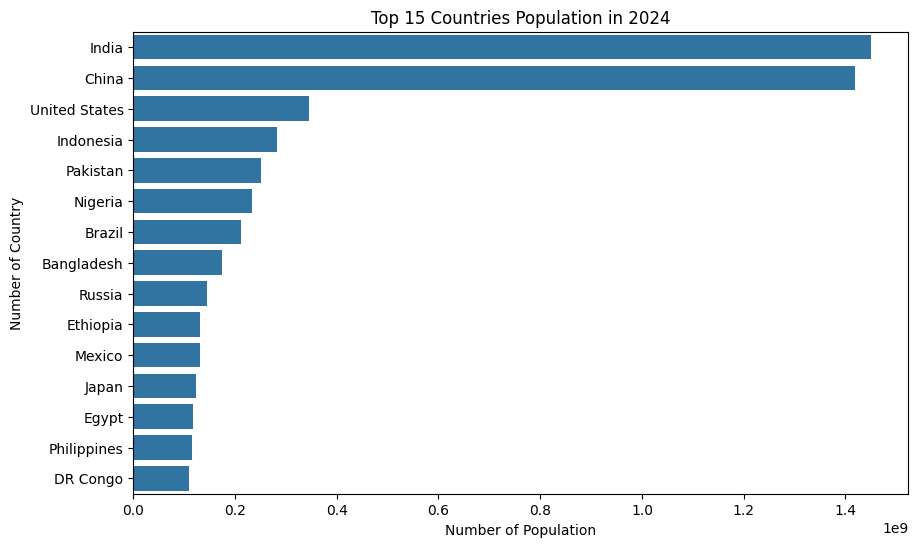

In [69]:
Top_15_country_population=data.sort_values(by='pop2024',ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x='pop2024',y='country',data=Top_15_country_population)
plt.title("Top 15 Countries Population in 2024")
plt.xlabel("Number of Population")
plt.ylabel("Number of Country")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

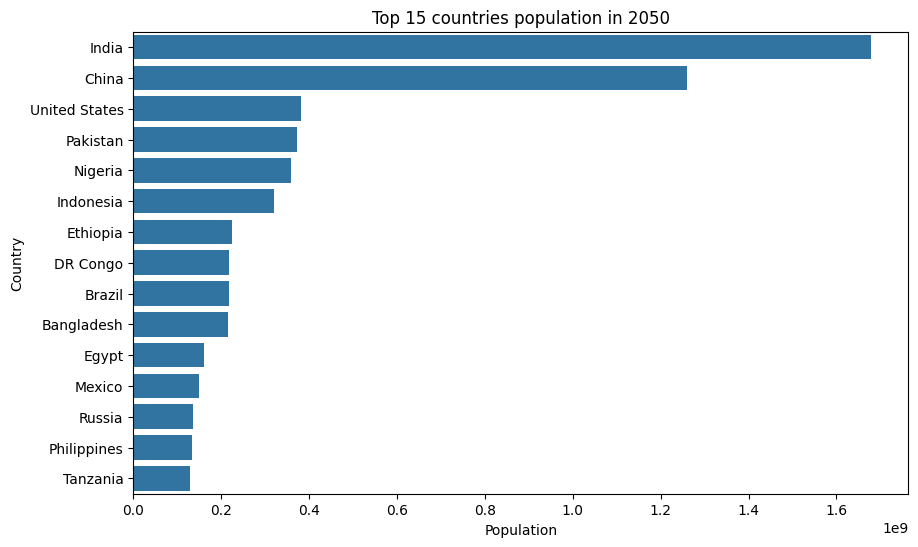

In [70]:
Top_15_country_population=data.sort_values(by='pop2050',ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x='pop2050',y='country',data=Top_15_country_population)
plt.title('Top 15 countries population in 2050')
plt.xlabel("Population")
plt.ylabel("Country")
plt.show
           

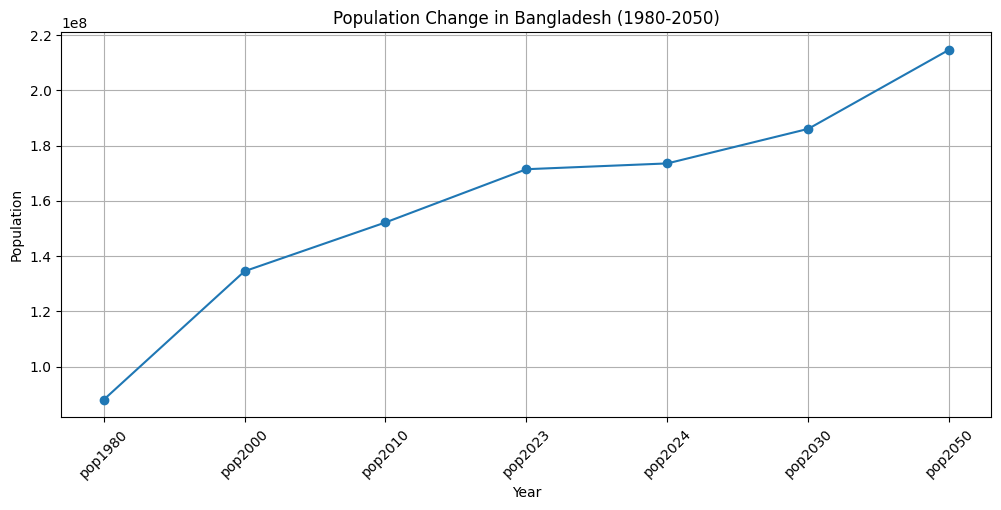

In [71]:
Bangladesh_data=data[data['country']=='Bangladesh']
plt.figure(figsize=(12,5))
plt.plot(Bangladesh_data.columns[1:8], Bangladesh_data.iloc[0,1:8], marker='o')
plt.title('Population Change in Bangladesh (1980-2050)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

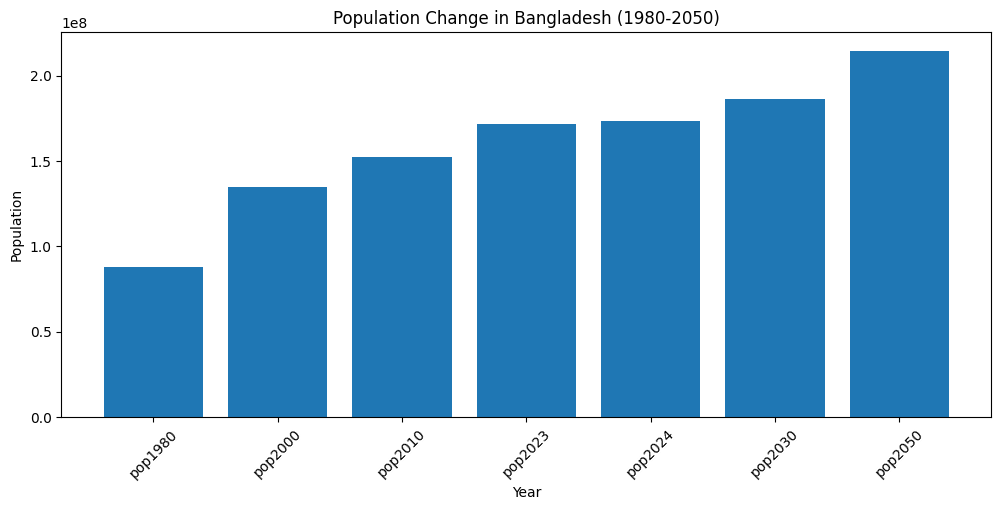

In [72]:
# Filter the data for Bangladesh
Bangladesh_data = data[data['country'] == 'Bangladesh']
# Create a bar plot
plt.figure(figsize=(12,5))
plt.bar(Bangladesh_data.columns[1:8], Bangladesh_data.iloc[0,1:8])  # No marker for bar plots
# Add title and labels
plt.title('Population Change in Bangladesh (1980-2050)')
plt.xlabel('Year')
plt.ylabel('Population')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()


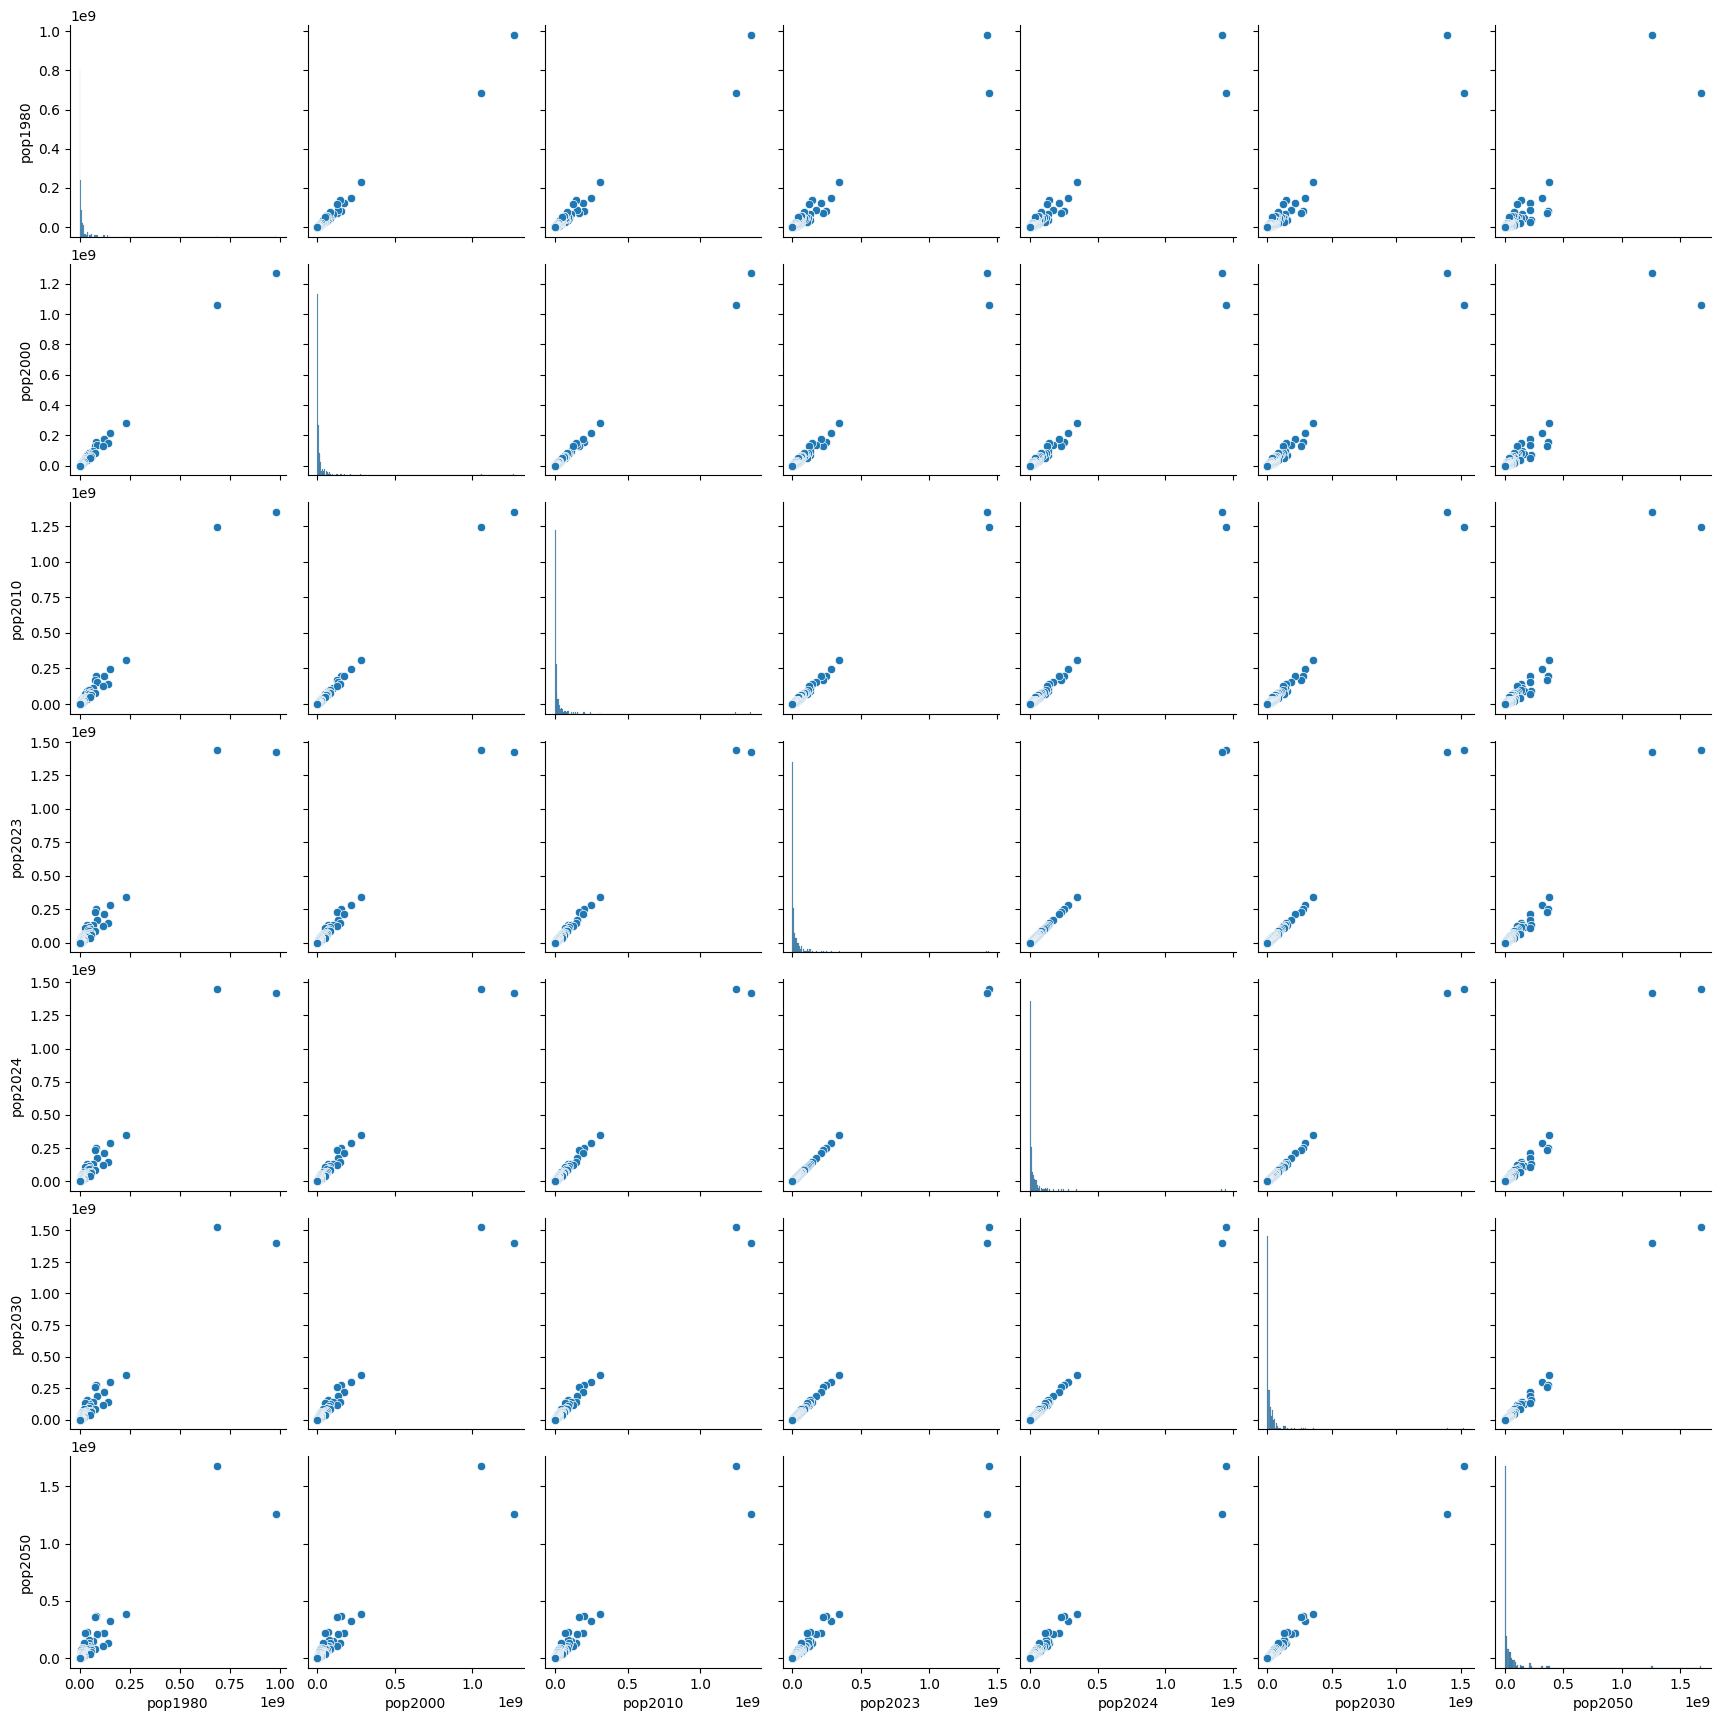

In [73]:
sns.pairplot(data[['pop1980', 'pop2000', 'pop2010', 'pop2023', 'pop2024', 'pop2030', 'pop2050']])
plt.show()

In [74]:

# Count and print the number of countries where 'unMember' is True
true_count = data[data["unMember"] == True].shape[0]
print(f'Number of countries where "unMember" is True: {true_count}')

# Count and print the number of countries where 'unMember' is False
false_count = data[data["unMember"] == False].shape[0]
print(f'Number of countries where "unMember" is False: {false_count}')


Number of countries where "unMember" is True: 195
Number of countries where "unMember" is False: 39


In [75]:
# Countries where 'unMember' is True
true_countries = data[data["unMember"] == True]["country"]
true_count = true_countries.shape[0]
print(f'Number of countries where "unMember" is True: {true_count}')
print('Countries where "unMember" is True:')
print(true_countries.tolist())

Number of countries where "unMember" is True: 195
Countries where "unMember" is True:
['India', 'China', 'United States', 'Indonesia', 'Pakistan', 'Nigeria', 'Brazil', 'Bangladesh', 'Russia', 'Ethiopia', 'Mexico', 'Japan', 'Egypt', 'Philippines', 'DR Congo', 'Vietnam', 'Iran', 'Turkey', 'Germany', 'Thailand', 'United Kingdom', 'Tanzania', 'France', 'South Africa', 'Italy', 'Kenya', 'Myanmar', 'Colombia', 'South Korea', 'Sudan', 'Uganda', 'Spain', 'Algeria', 'Iraq', 'Argentina', 'Afghanistan', 'Yemen', 'Canada', 'Poland', 'Morocco', 'Angola', 'Ukraine', 'Uzbekistan', 'Malaysia', 'Mozambique', 'Ghana', 'Peru', 'Saudi Arabia', 'Madagascar', 'Ivory Coast', 'Nepal', 'Cameroon', 'Venezuela', 'Niger', 'Australia', 'North Korea', 'Syria', 'Mali', 'Burkina Faso', 'Sri Lanka', 'Malawi', 'Zambia', 'Kazakhstan', 'Chad', 'Chile', 'Romania', 'Somalia', 'Senegal', 'Guatemala', 'Netherlands', 'Ecuador', 'Cambodia', 'Zimbabwe', 'Guinea', 'Benin', 'Rwanda', 'Burundi', 'Bolivia', 'Tunisia', 'South Sudan'

In [76]:
# Countries where 'unMember' is False
false_countries = data[data["unMember"] == False]["country"]
false_count = false_countries.shape[0]
print(f'Number of countries where "unMember" is False: {false_count}')
print('Countries where "unMember" is False:')
print(false_countries.tolist())

Number of countries where "unMember" is False: 39
Countries where "unMember" is False:
['Taiwan', 'Hong Kong', 'Puerto Rico', 'Reunion', 'Macau', 'Western Sahara', 'Guadeloupe', 'Martinique', 'Mayotte', 'French Guiana', 'New Caledonia', 'French Polynesia', 'Curacao', 'Guam', 'Aruba', 'Jersey', 'United States Virgin Islands', 'Isle of Man', 'Cayman Islands', 'Bermuda', 'Guernsey', 'Greenland', 'Faroe Islands', 'American Samoa', 'Turks and Caicos Islands', 'Northern Mariana Islands', 'Sint Maarten', 'British Virgin Islands', 'Gibraltar', 'Saint Martin', 'Anguilla', 'Cook Islands', 'Wallis and Futuna', 'Saint Barthelemy', 'Saint Pierre and Miquelon', 'Montserrat', 'Falkland Islands', 'Tokelau', 'Niue']


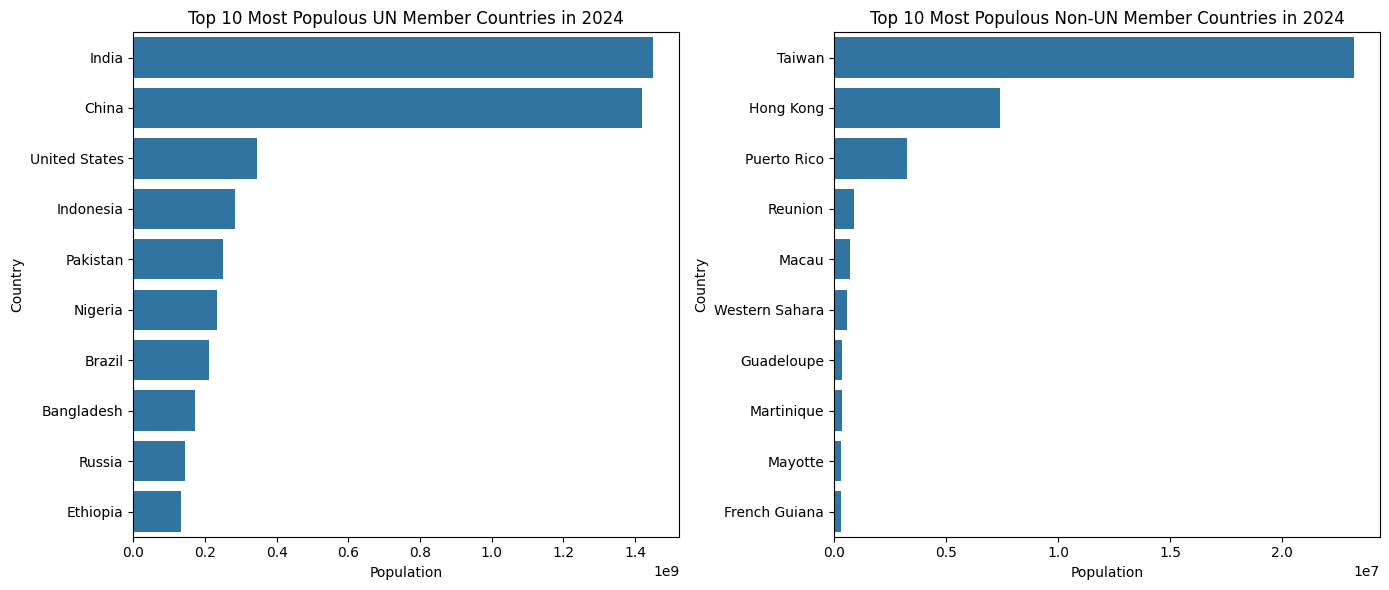

In [77]:
# Top 10 Most Populous Countries by UN Membership
# Top 10 UN Members
top_10_un_members =data[data['unMember']==True].nlargest(10,'pop2024')
plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.barplot(x='pop2024', y='country', data=top_10_un_members)
plt.title('Top 10 Most Populous UN Member Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')

# Top 10 Non-UN Members
top_10_non_un_members=data[data['unMember']==False].nlargest(10,'pop2024')
# Non-UN Members
plt.subplot(1, 2, 2)
sns.barplot(x='pop2024', y='country', data=top_10_non_un_members)
plt.title('Top 10 Most Populous Non-UN Member Countries in 2024')
plt.xlabel('Population')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

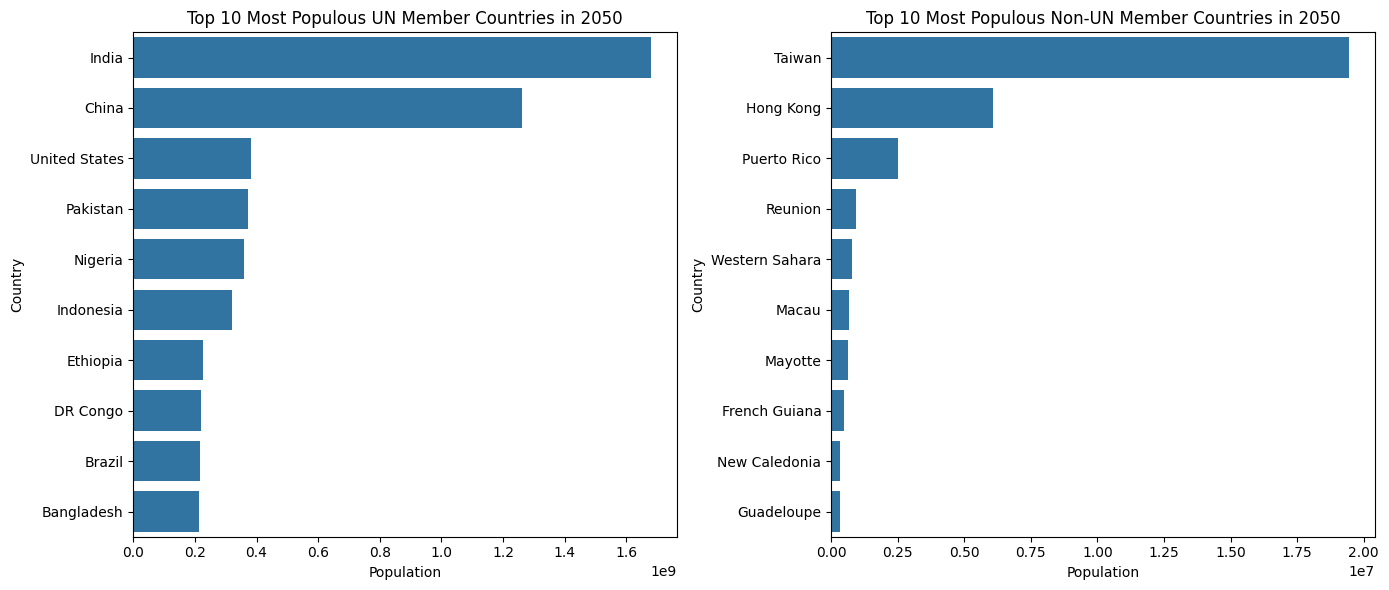

In [78]:
# Top 10 Most Populous Countries by UN Membership
# Top 10 UN Members
top_10_un_members =data[data['unMember']==True].nlargest(10,'pop2050')
plt.figure(figsize=(14, 6))

# UN Members
plt.subplot(1, 2, 1)
sns.barplot(x='pop2050', y='country', data=top_10_un_members)
plt.title('Top 10 Most Populous UN Member Countries in 2050')
plt.xlabel('Population')
plt.ylabel('Country')

# Top 10 Non-UN Members
top_10_non_un_members=data[data['unMember']==False].nlargest(10,'pop2050')
# Non-UN Members
plt.subplot(1, 2, 2)
sns.barplot(x='pop2050', y='country', data=top_10_non_un_members)
plt.title('Top 10 Most Populous Non-UN Member Countries in 2050')
plt.xlabel('Population')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

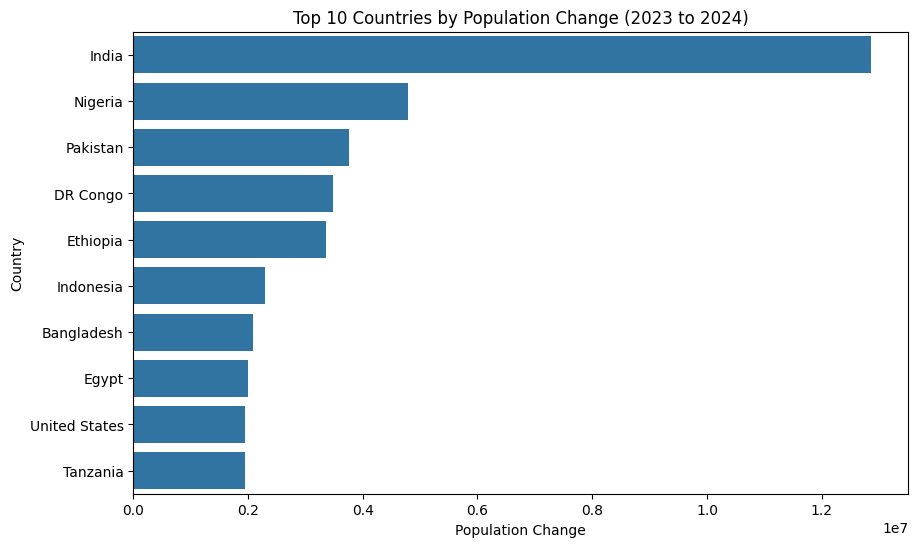

In [79]:
import matplotlib.pyplot as plt

# Calculate the population change from 2023 to 2024
data['Population Change'] = data['pop2024'] - data['pop2023']

# Select the top 10 countries by population change
top_10_countries = data.nlargest(10, 'Population Change').sort_values('Population Change', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Population Change',y='country',data=top_10_countries)

# Add labels and title
plt.xlabel('Population Change')
plt.ylabel('Country')
plt.title('Top 10 Countries by Population Change (2023 to 2024)')

# Show the plot
plt.show()


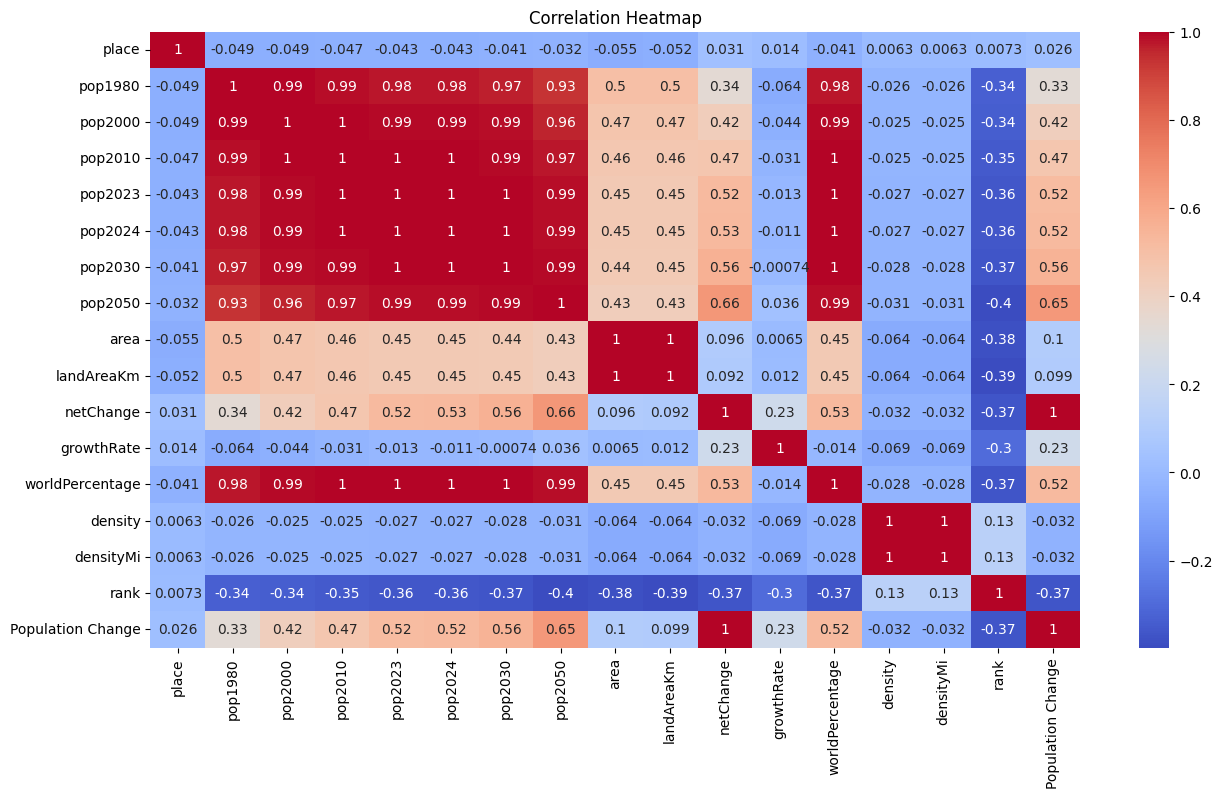

In [80]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [81]:
# Assuming df is your DataFrame and it has been loaded correctl
# Select features and target
features = ['pop1980', 'pop2000', 'pop2010', 'pop2023', 'pop2024', 'area', 'density', 'growthRate', 'worldPercentage']
target = 'pop2050'

X = data[features]
y = data[target]

# Handle NaN values - Imputation
imputer = SimpleImputer(strategy='median') # Replace NaNs with the median of the column
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))



Mean Squared Error: 147672398022769.06
R2 Score: 0.903820096449884


In [82]:
# Make Predictions: Predict future population (not growth rate, as target is pop2050)
future_population = model.predict(X_test_scaled)

# Display predictions
df_predictions = pd.DataFrame(X_test, columns=features)
df_predictions['Actual Population'] = y_test.values
df_predictions['Predicted Population'] = future_population

print(df_predictions.head())

      pop1980     pop2000     pop2010      pop2023      pop2024       area  \
0   6900212.0  11697592.0  14500112.0   18124838.0   18406359.0   108889.0   
1     53929.0     60269.0     61513.0      64017.0      64280.0       78.0   
2    115660.0    186281.0    238248.0     320409.0     327777.0    12189.0   
3  34428514.0  67411494.0  90538514.0  128691692.0  132059767.0  1104300.0   
4   1504782.0   1954709.0   2943372.0    4838782.0    4934507.0    17818.0   

     density  growthRate  worldPercentage  Actual Population  \
0   171.7652      0.0155           0.0023           24670857   
1  1020.3175      0.0041           0.0000              62800   
2    26.8890      0.0230           0.0000             534388   
3   117.0150      0.0262           0.0165          225021875   
4   276.9084      0.0198           0.0006            6367756   

   Predicted Population  
0          2.224020e+07  
1          5.533554e+04  
2          4.506841e+05  
3          1.538165e+08  
4          6.810

In [83]:

# Select features and target
features = ['pop1980', 'pop2000', 'pop2010', 'pop2023', 'pop2024','pop2050' ,'area', 'density', 'worldPercentage']
target = 'growthRate'

X = data[features]
y = data[target]

# Handle NaN values - Imputation
imputer = SimpleImputer(strategy='median') # Replace NaNs with the median of the column
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))



Mean Squared Error: 0.00012453123897183098
R2 Score: 0.39861896266676666


In [84]:
 #Make Predictions: Predict future population (not growth rate, as target is pop2050)
future_population = model.predict(X_test_scaled)

# Display predictions
df_predictions = pd.DataFrame(X_test, columns=features)
df_predictions['Actual Growth Rate'] = y_test.values
df_predictions['Predicted Growth Rate'] = future_population

print(df_predictions.head())

      pop1980     pop2000     pop2010      pop2023      pop2024      pop2050  \
0   6900212.0  11697592.0  14500112.0   18124838.0   18406359.0   24670857.0   
1     53929.0     60269.0     61513.0      64017.0      64280.0      62800.0   
2    115660.0    186281.0    238248.0     320409.0     327777.0     534388.0   
3  34428514.0  67411494.0  90538514.0  128691692.0  132059767.0  225021875.0   
4   1504782.0   1954709.0   2943372.0    4838782.0    4934507.0    6367756.0   

        area    density  worldPercentage  Actual Growth Rate  \
0   108889.0   171.7652           0.0023              0.0155   
1       78.0  1020.3175           0.0000              0.0041   
2    12189.0    26.8890           0.0000              0.0230   
3  1104300.0   117.0150           0.0165              0.0262   
4    17818.0   276.9084           0.0006              0.0198   

   Predicted Growth Rate  
0               0.019235  
1               0.003981  
2               0.012623  
3               0.015450  

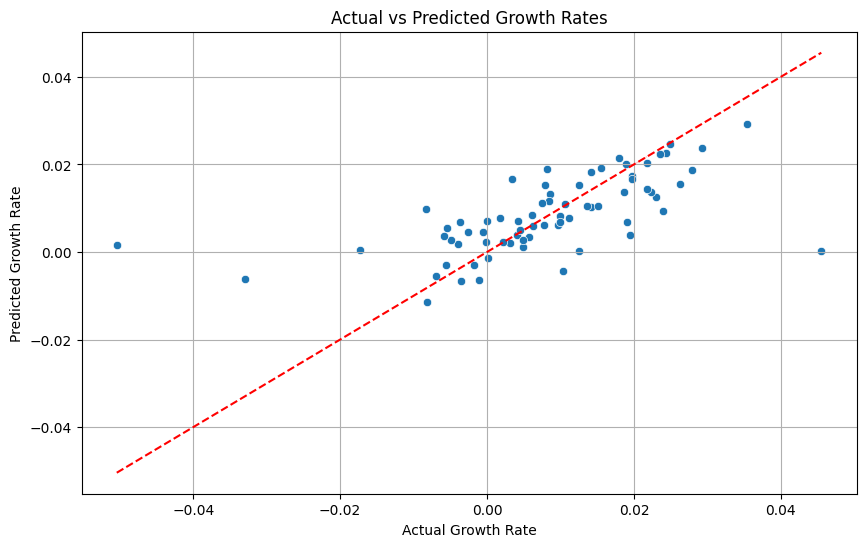

In [85]:
#Plot actual vs predicted growth rates using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Growth Rate', y='Predicted Growth Rate', data=df_predictions)
sns.lineplot(x=df_predictions['Actual Growth Rate'], y=df_predictions['Actual Growth Rate'], color='red', linestyle='--')
plt.title('Actual vs Predicted Growth Rates')
plt.xlabel('Actual Growth Rate')
plt.ylabel('Predicted Growth Rate')
plt.grid(True)
plt.show()

In [86]:
# Assuming df is your DataFrame and it has been loaded correctly

# Select features and target
features = ['pop1980', 'pop2000', 'pop2010', 'pop2023', 'pop2024', 'area', 'density', 'worldPercentage']
target = 'growthRate'

X = data[features]
y = data[target]

# Handle NaN values - Imputation
imputer = SimpleImputer(strategy='median') # Replace NaNs with the median of the column
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Display predictions
df_predictions = pd.DataFrame(X_test_scaled, columns=features)
df_predictions['Actual Growth Rate'] = y_test.values
df_predictions['Predicted Growth Rate'] = y_pred

print(df_predictions.head())


Mean Squared Error: 0.0002023422816862119
R2 Score: 0.022857138004122923
    pop1980   pop2000   pop2010   pop2023   pop2024      area   density  \
0 -0.169442 -0.156157 -0.151471 -0.148263 -0.148136 -0.307231 -0.104341   
1 -0.240291 -0.243926 -0.249350 -0.259076 -0.260238 -0.359837  0.375349   
2 -0.239652 -0.242975 -0.248152 -0.257503 -0.258628 -0.353982 -0.186240   
3  0.115437  0.264039  0.363991  0.530125  0.546489  0.174013 -0.135292   
4 -0.225277 -0.229638 -0.229814 -0.229780 -0.230473 -0.351260 -0.044903   

   worldPercentage  Actual Growth Rate  Predicted Growth Rate  
0        -0.148914              0.0155               0.009804  
1        -0.261470              0.0041               0.008902  
2        -0.261470              0.0230               0.009262  
3         0.545998              0.0262               0.030989  
4        -0.232108              0.0198               0.009502  


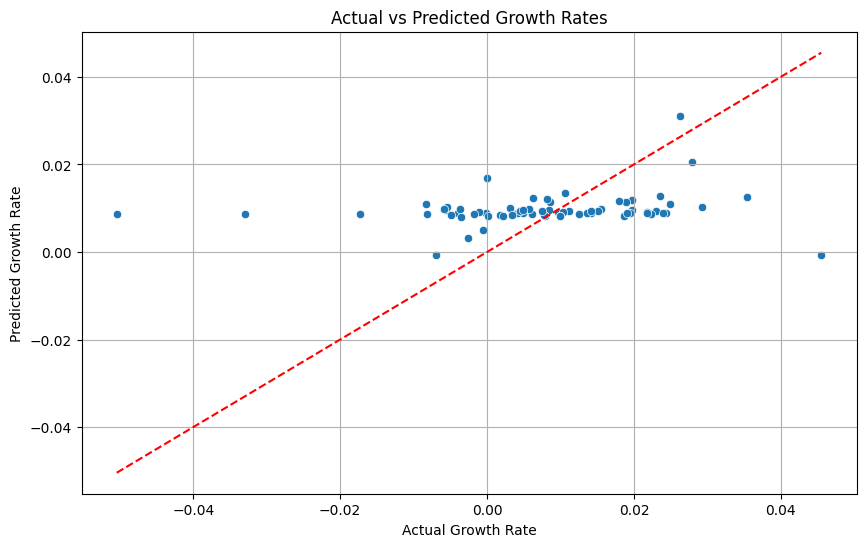

In [87]:
#Plot actual vs predicted growth rates using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Growth Rate', y='Predicted Growth Rate', data=df_predictions)
sns.lineplot(x=df_predictions['Actual Growth Rate'], y=df_predictions['Actual Growth Rate'], color='red', linestyle='--')
plt.title('Actual vs Predicted Growth Rates')
plt.xlabel('Actual Growth Rate')
plt.ylabel('Predicted Growth Rate')
plt.grid(True)
plt.show()

Mean Squared Error (Gradient Boosting): 0.0001462483723456561
R2 Score (Gradient Boosting): 0.2937434928321706
    pop1980   pop2000   pop2010   pop2023   pop2024      area   density  \
0 -0.169442 -0.156157 -0.151471 -0.148263 -0.148136 -0.307231 -0.104341   
1 -0.240291 -0.243926 -0.249350 -0.259076 -0.260238 -0.359837  0.375349   
2 -0.239652 -0.242975 -0.248152 -0.257503 -0.258628 -0.353982 -0.186240   
3  0.115437  0.264039  0.363991  0.530125  0.546489  0.174013 -0.135292   
4 -0.225277 -0.229638 -0.229814 -0.229780 -0.230473 -0.351260 -0.044903   

   worldPercentage  Actual Growth Rate  Predicted Growth Rate  
0        -0.148914              0.0155               0.014087  
1        -0.261470              0.0041               0.001172  
2        -0.261470              0.0230               0.008048  
3         0.545998              0.0262               0.016847  
4        -0.232108              0.0198               0.019287  


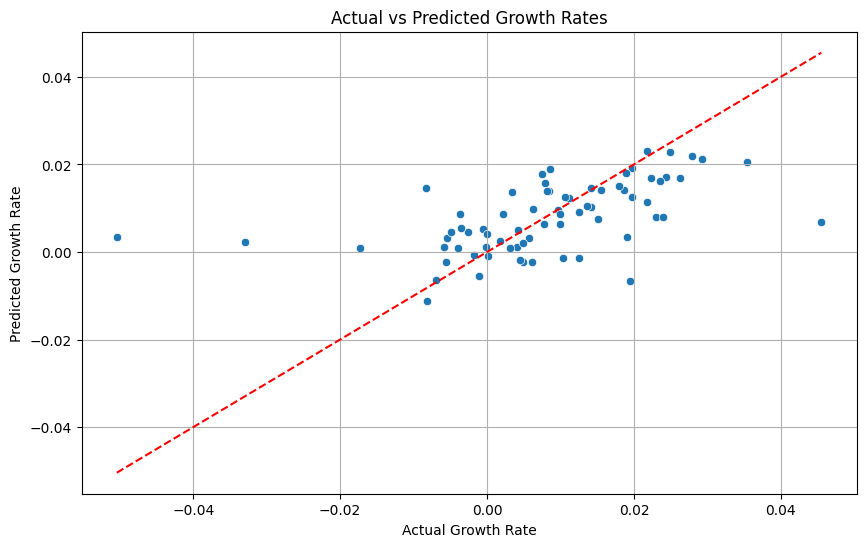

In [88]:

# Select features and target
features = ['pop1980', 'pop2000', 'pop2010', 'pop2023', 'pop2024', 'area', 'density', 'worldPercentage']
target = 'growthRate'

X = data[features]
y = data[target]

# Handle NaN values - Imputation
imputer = SimpleImputer(strategy='median') # Replace NaNs with the median of the column
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print('Mean Squared Error (Gradient Boosting):', mean_squared_error(y_test, y_pred))
print('R2 Score (Gradient Boosting):', r2_score(y_test, y_pred))

# Display predictions
df_predictions = pd.DataFrame(X_test_scaled, columns=features)
df_predictions['Actual Growth Rate'] = y_test.values
df_predictions['Predicted Growth Rate'] = y_pred

print(df_predictions.head())

#Plot actual vs predicted growth rates using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Growth Rate', y='Predicted Growth Rate', data=df_predictions)
sns.lineplot(x=df_predictions['Actual Growth Rate'], y=df_predictions['Actual Growth Rate'], color='red', linestyle='--')
plt.title('Actual vs Predicted Growth Rates')
plt.xlabel('Actual Growth Rate')
plt.ylabel('Predicted Growth Rate')
plt.grid(True)
plt.show()

Mean Squared Error (XGBoost): 0.00015517597882315924
R2 Score (XGBoost): 0.1718086572204217
    pop1980   pop2000   pop2010   pop2023   pop2024      area   density  \
0 -0.149069 -0.137440 -0.132687 -0.129586 -0.129439 -0.320184 -0.111512   
1 -0.222427 -0.233665 -0.244303 -0.261254 -0.263311 -0.368257  0.297333   
2 -0.221765 -0.232623 -0.242937 -0.259385 -0.261387 -0.362907 -0.181316   
3  0.145896  0.323238  0.455122  0.676472  0.700071  0.119593 -0.137892   
4 -0.206881 -0.218000 -0.222025 -0.226445 -0.227765 -0.360420 -0.060853   

   worldPercentage  Actual Growth Rate  Predicted Growth Rate  
0        -0.130668              0.0155               0.017592  
1        -0.265082              0.0041               0.005244  
2        -0.265082              0.0230               0.009773  
3         0.699193              0.0262               0.009940  
4        -0.230017              0.0198               0.019172  


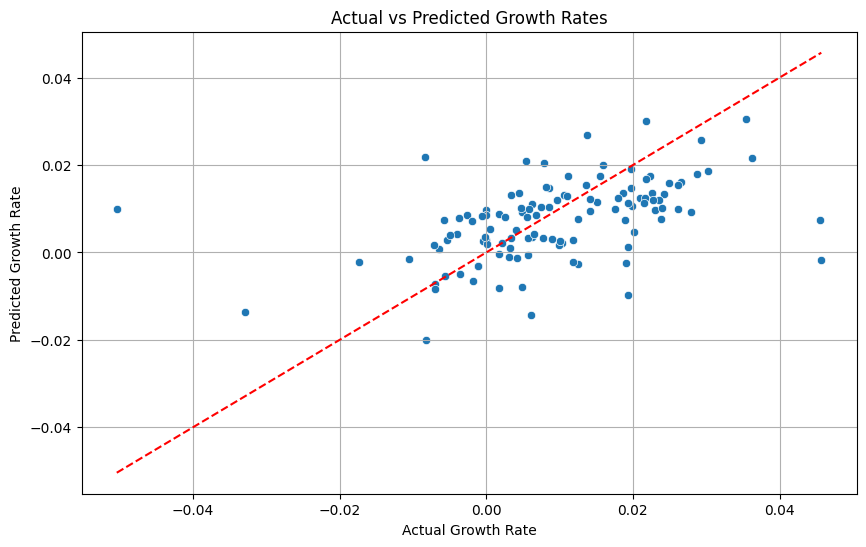

In [89]:
# Select features and target
features = ['pop1980', 'pop2000', 'pop2010', 'pop2023', 'pop2024', 'area', 'density', 'worldPercentage']
target = 'growthRate'

X = data[features]
y = data[target]

# Handle NaN values - Imputation
imputer = SimpleImputer(strategy='median') # Replace NaNs with the median of the column
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.5, random_state=42)

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Training
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print('Mean Squared Error (XGBoost):', mean_squared_error(y_test, y_pred))
print('R2 Score (XGBoost):', r2_score(y_test, y_pred))

# Display predictions
df_predictions = pd.DataFrame(X_test_scaled, columns=features)
df_predictions['Actual Growth Rate'] = y_test.values
df_predictions['Predicted Growth Rate'] = y_pred

print(df_predictions.head())
#Plot actual vs predicted growth rates using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Growth Rate', y='Predicted Growth Rate', data=df_predictions)
sns.lineplot(x=df_predictions['Actual Growth Rate'], y=df_predictions['Actual Growth Rate'], color='red', linestyle='--')
plt.title('Actual vs Predicted Growth Rates')
plt.xlabel('Actual Growth Rate')
plt.ylabel('Predicted Growth Rate')
plt.grid(True)
plt.show()

In [90]:

# Select features and target
features = ['pop1980', 'pop2000', 'pop2010', 'pop2023', 'pop2024', 'area', 'density', 'worldPercentage']
target = 'growthRate'

X = data[features]
y = data[target]

# Handle NaN values - Imputation
imputer = SimpleImputer(strategy='median') # Replace NaNs with the median of the column
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Data Preprocessing: Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)

# Train model with best parameters
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Cross-validation
cv_scores = cross_val_score(model, X_imputed, y, cv=5, scoring='r2')
print('Cross-Validation R2 Scores:', cv_scores)
print('Mean Cross-Validation R2 Score:', cv_scores.mean())

# Display predictions
df_predictions = pd.DataFrame(X_test_scaled, columns=features)
df_predictions['Actual Growth Rate'] = y_test.values
df_predictions['Predicted Growth Rate'] = y_pred

print(df_predictions.head())


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\mdsha\anaconda3\envs\QBronze\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
196 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mdsha\anaconda3\envs\QBronze\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mdsha\anaconda3\envs\QBronze\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\mdsha\anaconda3\envs\QBronze\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrai

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Mean Squared Error: 0.00014687408862375448
R2 Score: 0.29072181001984254
Cross-Validation R2 Scores: [ 0.08550472 -0.13394404  0.27671711  0.01497943 -1.42452654]
Mean Cross-Validation R2 Score: -0.23625386318568492
    pop1980   pop2000   pop2010   pop2023   pop2024      area   density  \
0 -0.169442 -0.156157 -0.151471 -0.148263 -0.148136 -0.307231 -0.104341   
1 -0.240291 -0.243926 -0.249350 -0.259076 -0.260238 -0.359837  0.375349   
2 -0.239652 -0.242975 -0.248152 -0.257503 -0.258628 -0.353982 -0.186240   
3  0.115437  0.264039  0.363991  0.530125  0.546489  0.174013 -0.135292   
4 -0.225277 -0.229638 -0.229814 -0.229780 -0.230473 -0.351260 -0.044903   

   worldPercentage  Actual Growth Rate  Predicted Growth Rate  
0        -0.148914              0.0155               0.013471  
1        -0.261470              0.0041               0.002050  
2        -0.26